# **Task 2 - Exploratory Data Analysis (EDA)**

In [2]:
# Add the parent directory to the system path 
import os
import sys
sys.path.append(os.path.abspath(os.path.join('..')))

# Importing modules from scripts 

In [3]:
from scripts.EDA_Analysis import *
from scripts.logger import setup_logger

In [5]:
#logger
logger = setup_logger('eda_logger', '../logs/EDA.log')

# Load the data

In [6]:
data = load_data('../data/data.csv')
variables=load_data('../data/Xente_Variable_Definitions.csv')
logger.info("Data loaded successfully.")

# Properties of the data

In [7]:
data.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15T03:32:55Z,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15T03:34:21Z,2,0


In [8]:
data.tail()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
95657,TransactionId_89881,BatchId_96668,AccountId_4841,SubscriptionId_3829,CustomerId_3078,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-1000.0,1000,2019-02-13T09:54:09Z,2,0
95658,TransactionId_91597,BatchId_3503,AccountId_3439,SubscriptionId_2643,CustomerId_3874,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2019-02-13T09:54:25Z,2,0
95659,TransactionId_82501,BatchId_118602,AccountId_4841,SubscriptionId_3829,CustomerId_3874,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2019-02-13T09:54:35Z,2,0
95660,TransactionId_136354,BatchId_70924,AccountId_1346,SubscriptionId_652,CustomerId_1709,UGX,256,ProviderId_6,ProductId_19,tv,ChannelId_3,3000.0,3000,2019-02-13T10:01:10Z,2,0
95661,TransactionId_35670,BatchId_29317,AccountId_4841,SubscriptionId_3829,CustomerId_1709,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-60.0,60,2019-02-13T10:01:28Z,2,0


# **1.** Overview of the Data

In [11]:
print("Data Overview:")
data_overview(data)
logger.info("Data overview analysis completed.")

Data Overview:
Dataset Shape: (95662, 16)

Column Names: ['TransactionId', 'BatchId', 'AccountId', 'SubscriptionId', 'CustomerId', 'CurrencyCode', 'CountryCode', 'ProviderId', 'ProductId', 'ProductCategory', 'ChannelId', 'Amount', 'Value', 'TransactionStartTime', 'PricingStrategy', 'FraudResult']

Data Types:
TransactionId            object
BatchId                  object
AccountId                object
SubscriptionId           object
CustomerId               object
CurrencyCode             object
CountryCode               int64
ProviderId               object
ProductId                object
ProductCategory          object
ChannelId                object
Amount                  float64
Value                     int64
TransactionStartTime     object
PricingStrategy           int64
FraudResult               int64
dtype: object

Missing Values:
TransactionId           0
BatchId                 0
AccountId               0
SubscriptionId          0
CustomerId              0
CurrencyCode    

# Identify for any duplicate transaction

In [10]:
duplicates = data.duplicated().sum()
print(duplicates)

0


# Columns definitions 

In [12]:
print("\n Variables Definitions")
print(variables)


 Variables Definitions
             Column Name                                         Definition
0          TransactionId         Unique �transaction identifier on platform
1                BatchId  Unique number assigned to a batch of transacti...
2              AccountId  Unique number identifying the customer on plat...
3         SubscriptionId  Unique number identifying the customer subscri...
4             CustomerId              Unique identifier attached to Account
5           CurrencyCode                                   Country currency
6            CountryCode             Numerical geographical code of country
7             ProviderId                   Source provider of Item �bought.
8              ProductId                            Item name being bought.
9        ProductCategory  ProductIds are organized into these broader pr...
10             ChannelId  Identifies if customer used web,Android, IOS, ...
11                Amount  Value of the transaction. Positive for

#  **2.** Summary Statistics

In [13]:
print("\n Summary Statistics:")
print(summary_statistics(data))
logger.info("Summary statistics of numeric columns completed")


 Summary Statistics:
       CountryCode        Amount         Value  PricingStrategy   FraudResult
count      95662.0  9.566200e+04  9.566200e+04     95662.000000  95662.000000
mean         256.0  6.717846e+03  9.900584e+03         2.255974      0.002018
std            0.0  1.233068e+05  1.231221e+05         0.732924      0.044872
min          256.0 -1.000000e+06  2.000000e+00         0.000000      0.000000
25%          256.0 -5.000000e+01  2.750000e+02         2.000000      0.000000
50%          256.0  1.000000e+03  1.000000e+03         2.000000      0.000000
75%          256.0  2.800000e+03  5.000000e+03         2.000000      0.000000
max          256.0  9.880000e+06  9.880000e+06         4.000000      1.000000


# Check the number of unique values in categorical columns

In [15]:
print (data['ProductCategory'].unique())
print (data['CountryCode'].unique())
print (data['ChannelId'].unique())

['airtime' 'financial_services' 'utility_bill' 'data_bundles' 'tv'
 'transport' 'ticket' 'movies' 'other']
[256]
['ChannelId_3' 'ChannelId_2' 'ChannelId_1' 'ChannelId_5']


# **3.** Distribution of Numerical Features


Distribution of Numerical Features:


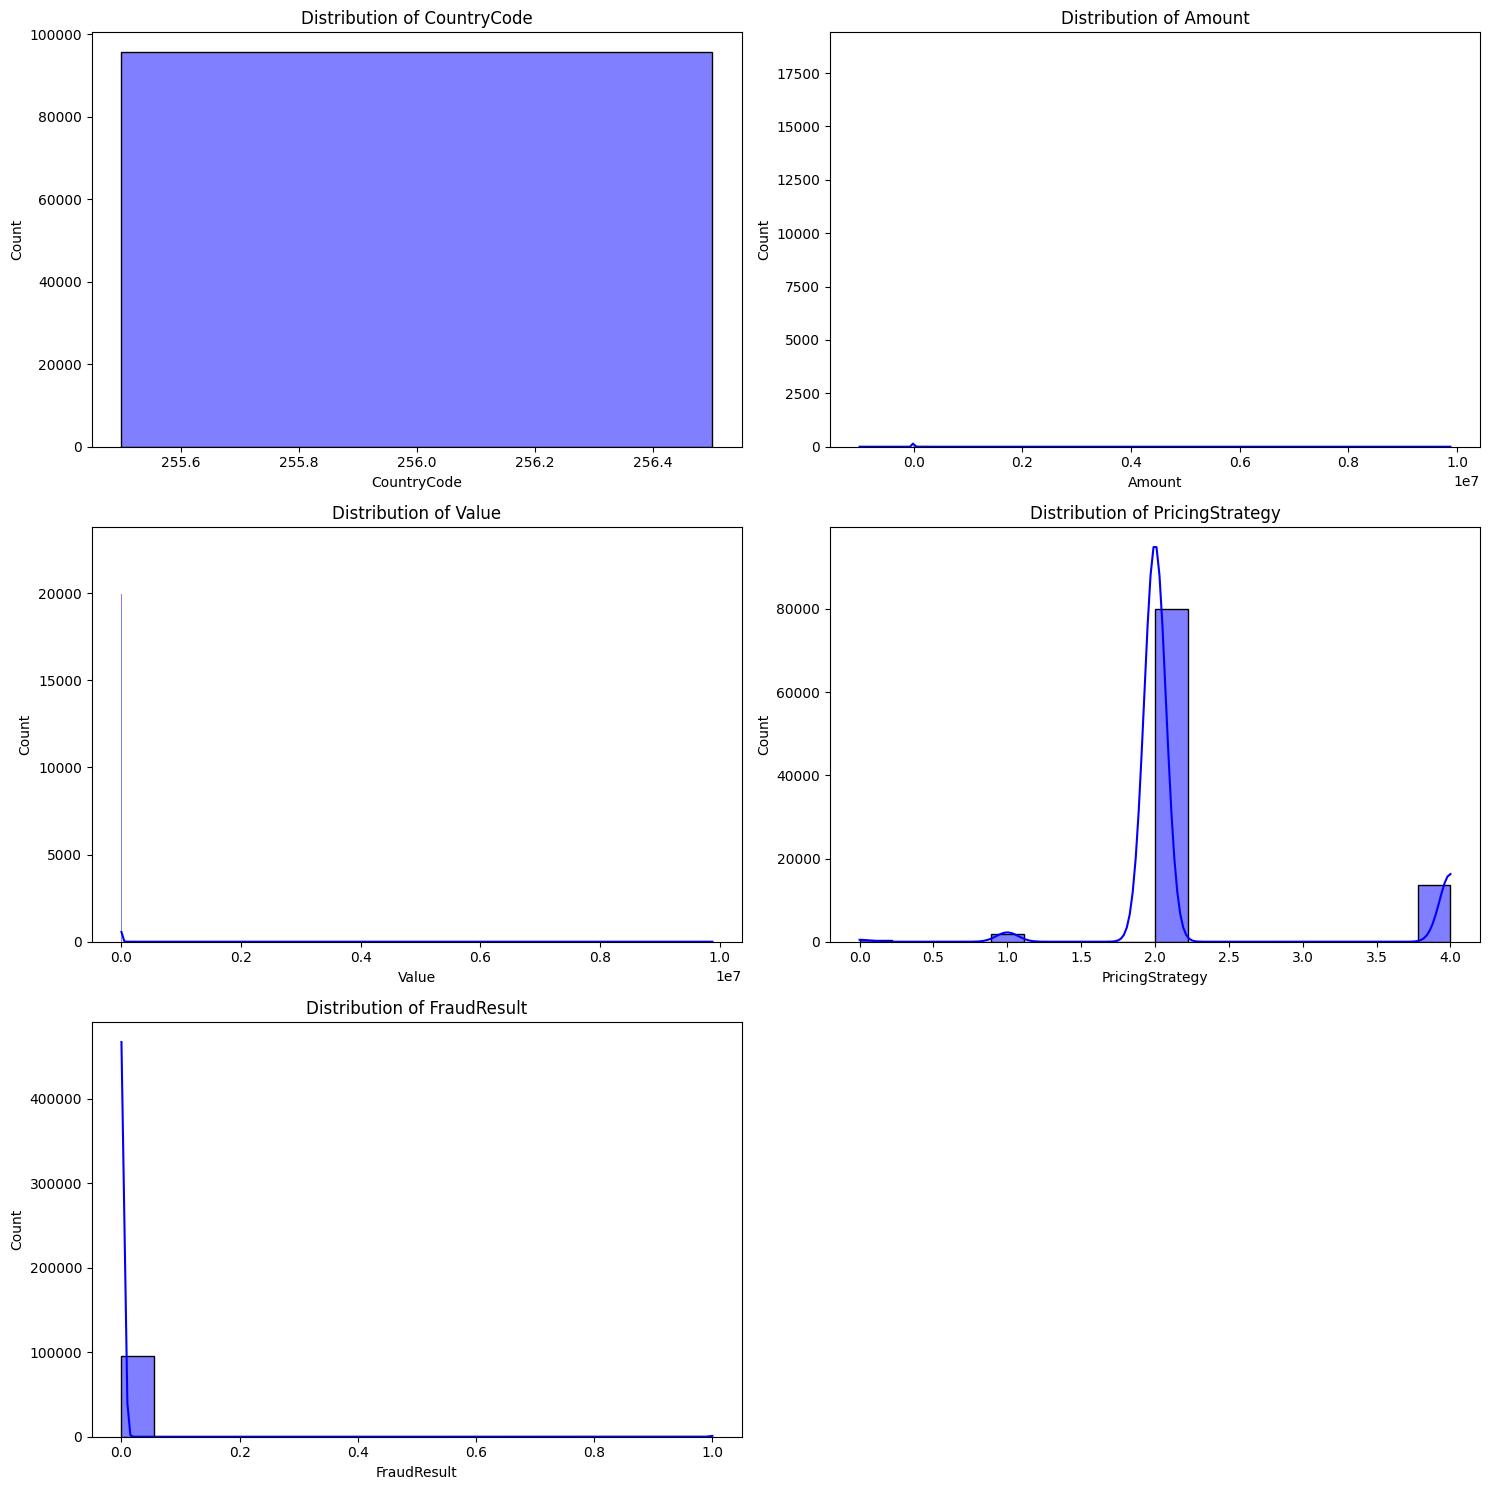

In [16]:
print("\nDistribution of Numerical Features:")
plot_numerical_distributions(data)
logger.info("univariate analysis of numeric columns completed")

# **4.** Distribution of Categorical Features


Distribution of Categorical Features:


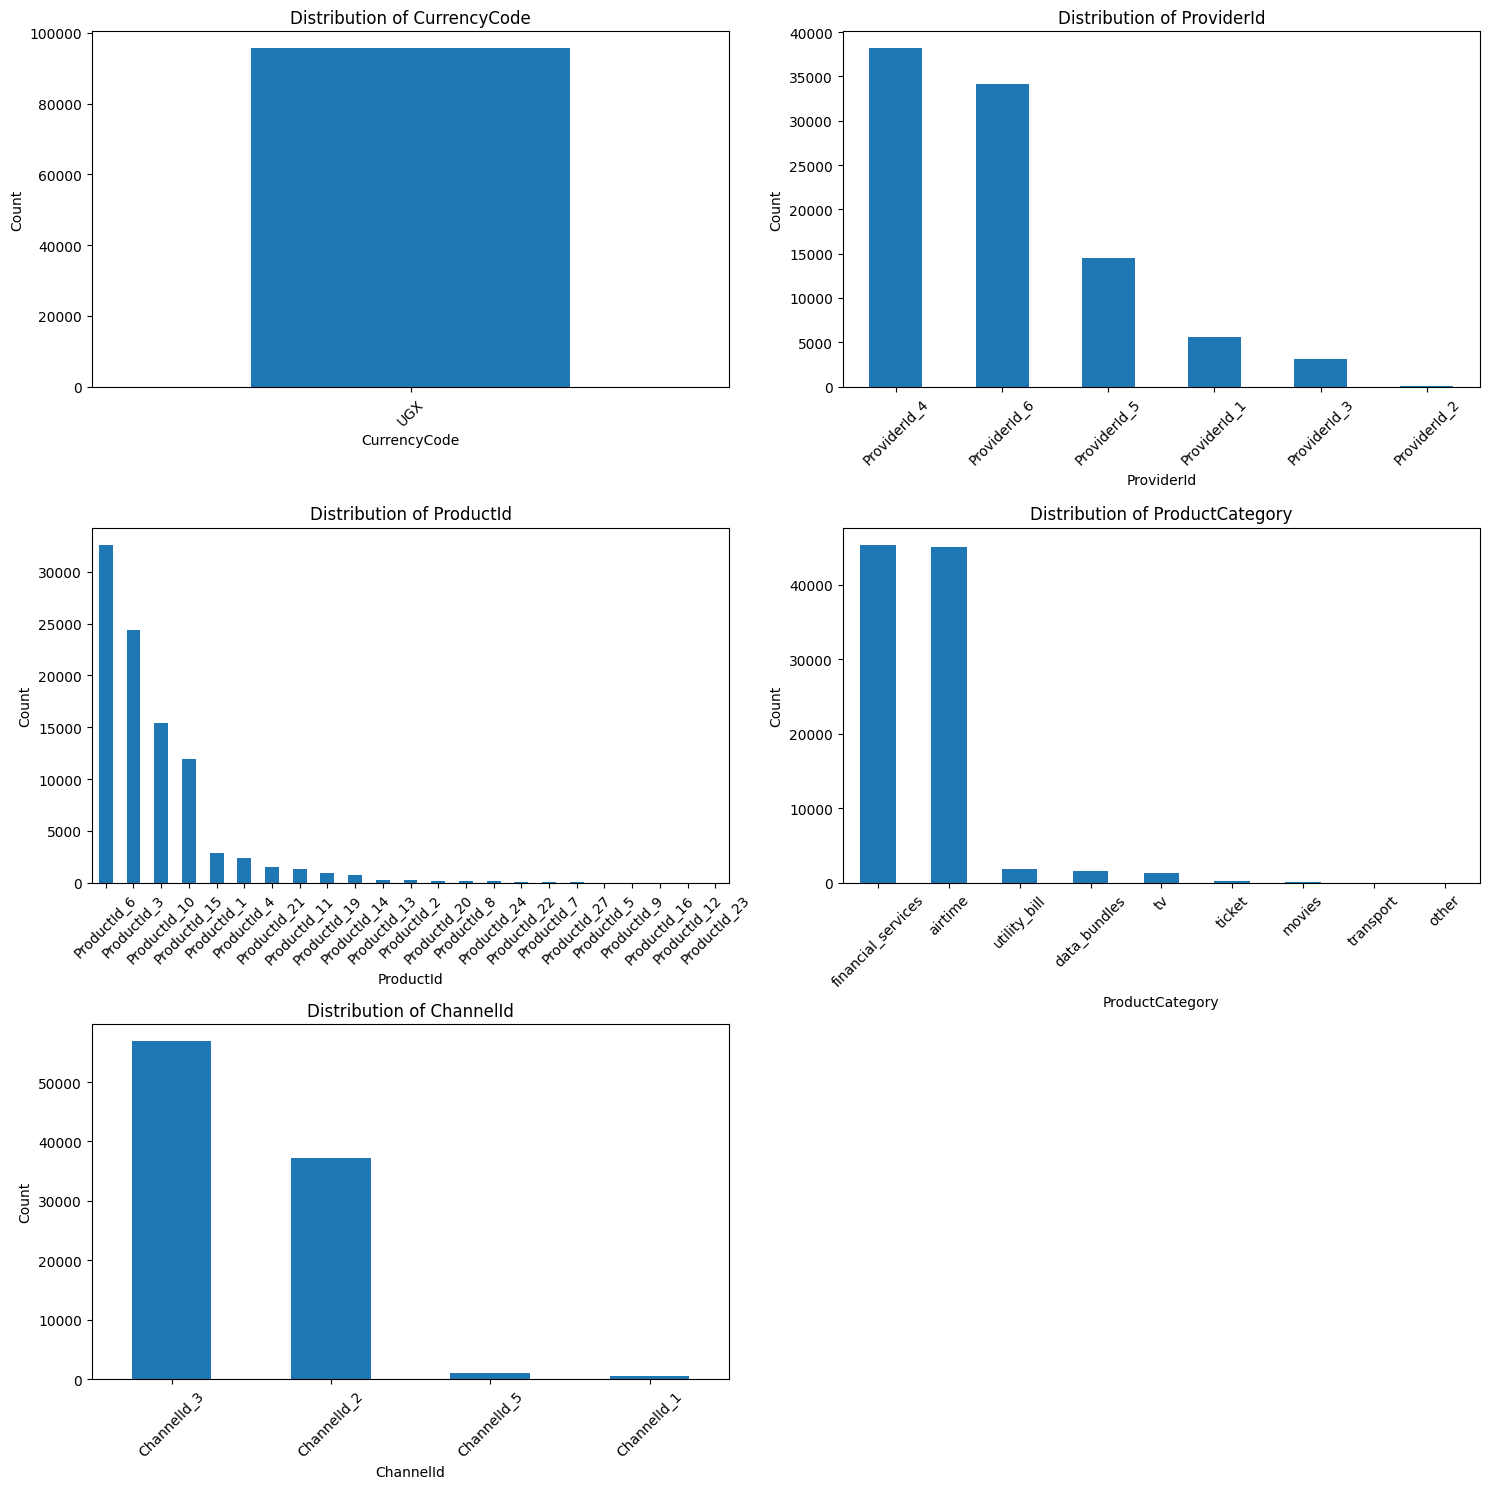

In [18]:
print("\nDistribution of Categorical Features:") 
categorical_columns=['CurrencyCode','ProviderId','ProductId','ProductCategory','ChannelId']
plot_categorical_distributions(data, categorical_columns)
logger.info("univariate analysis of categorical columns completed")

# **4.** Correlation Analysis


Correlation Analysis:


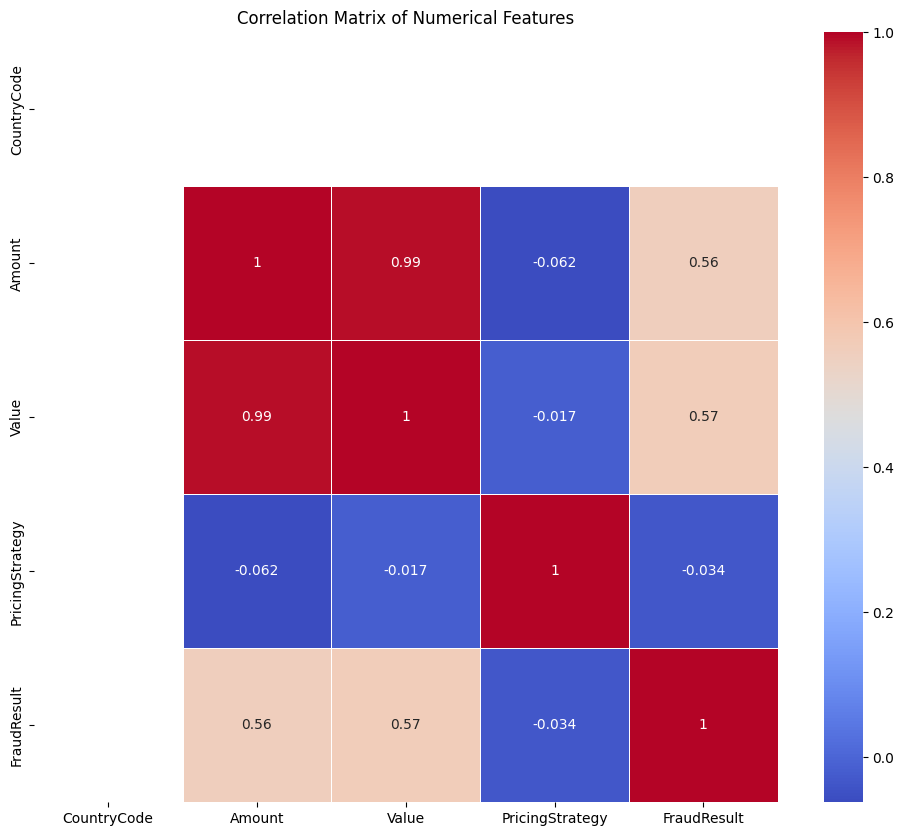

In [19]:
print("\nCorrelation Analysis:")
correlation_analysis(data)